# Проект 7. Машинное обучение в бизнесе.

## Оценка нефтедобывающих регионов
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [2]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f45ba610>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f54fd990>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f544fb90>]]


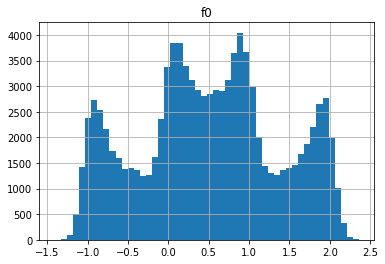

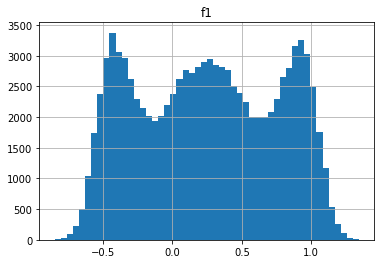

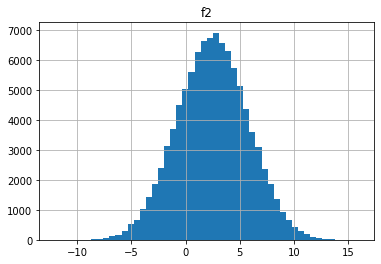

In [3]:
for column in df1[['f0', 'f1', 'f2']]:
    print(df1.hist(column, bins=50))

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f4a0b710>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f2348d50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f2294fd0>]]


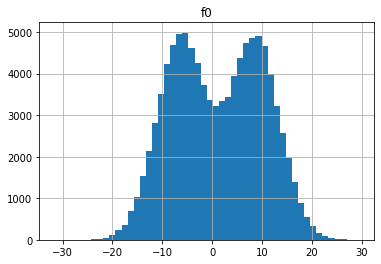

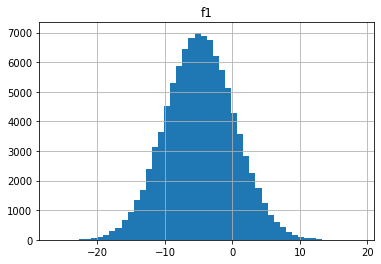

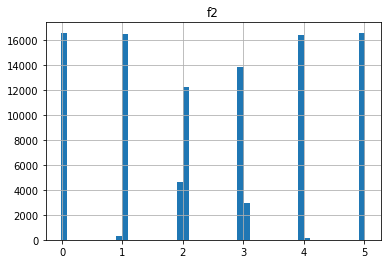

In [6]:
for column in df2[['f0', 'f1', 'f2']]:
    print(df2.hist(column, bins=50))

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f20f5f90>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f4987a10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f544f1d0>]]


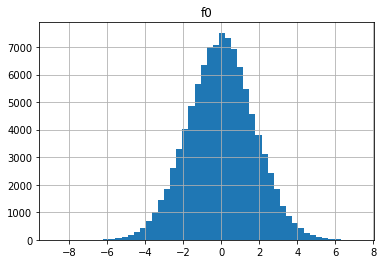

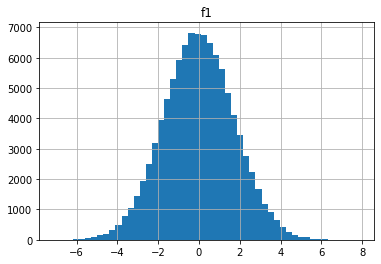

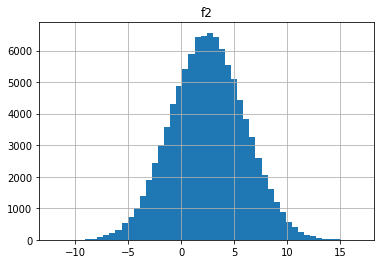

In [9]:
for column in df3[['f0', 'f1', 'f2']]:
    print(df3.hist(column, bins=50))

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df1 = df1.drop('id', axis=1)
df2 = df2.drop('id', axis=1)
df3 = df3.drop('id', axis=1)

In [12]:
def split(df):
    target = df['product']
    features = df.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

features1_train, features1_valid, target1_train, target1_valid = split(df1)
features2_train, features2_valid, target2_train, target2_valid = split(df2)
features3_train, features3_valid, target3_train, target3_valid = split(df3)

print(features1_train.shape, target1_train.shape)
print(features2_train.shape, target2_train.shape)
print(features3_train.shape, target3_train.shape)

features1_valid.shape, target1_valid.shape

(75000, 3) (75000,)
(75000, 3) (75000,)
(75000, 3) (75000,)


((25000, 3), (25000,))

In [13]:
numeric = ['f0', 'f1', 'f2']

scaler1 = StandardScaler()
scaler1.fit(features1_train[numeric])
features1_train[numeric] = scaler1.transform(features1_train[numeric])
features1_valid[numeric] = scaler1.transform(features1_valid[numeric])

scaler2 = StandardScaler()
scaler2.fit(features2_train[numeric])
features2_train[numeric] = scaler2.transform(features2_train[numeric])
features2_valid[numeric] = scaler2.transform(features2_valid[numeric])

scaler3 = StandardScaler()
scaler3.fit(features3_train[numeric])
features3_train[numeric] = scaler3.transform(features3_train[numeric])
features3_valid[numeric] = scaler3.transform(features3_valid[numeric])

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f55313d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f224e750>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f23338d0>]]


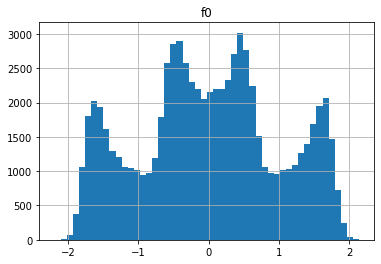

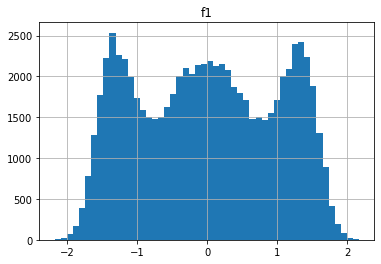

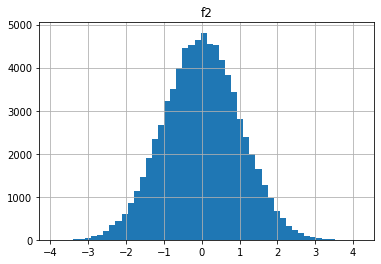

In [14]:
for column in features1_train.columns:
    print(features1_train.hist(column, bins=50))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f2191810>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f54d4350>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f1611350>]]


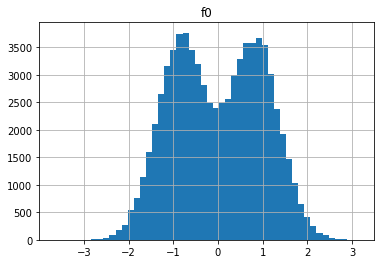

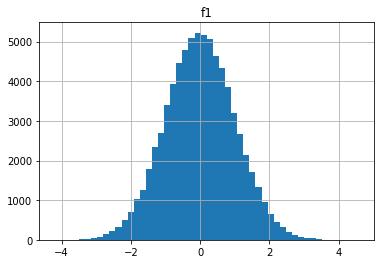

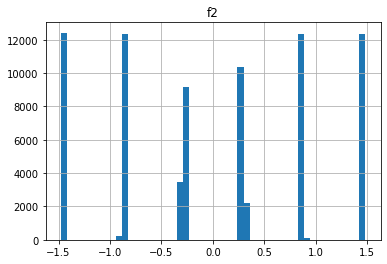

In [15]:
for column in features2_train.columns:
    print(features2_train.hist(column, bins=50))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f1512f10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f13bec90>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f130ae90>]]


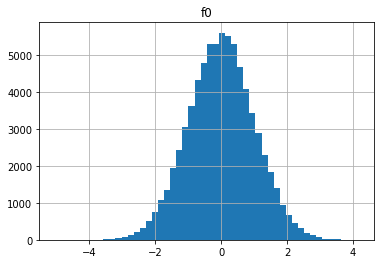

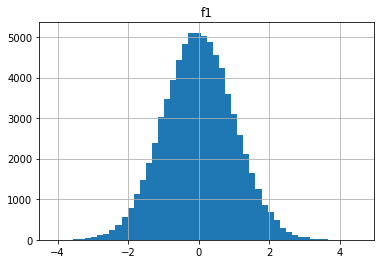

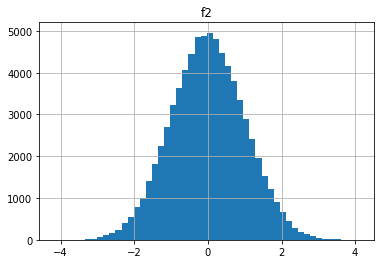

In [16]:
for column in features3_train.columns:
    print(features3_train.hist(column, bins=50))

# 2. Обучение и проверка модели

In [17]:
model1 = LinearRegression()
model1.fit(features1_train, target1_train)
predicted1_valid = model1.predict(features1_valid)
mse1 = mean_squared_error(predicted1_valid, target1_valid)
mean_prediction1 = pd.Series(predicted1_valid).mean()
sum_prediction1 = pd.Series(predicted1_valid).sort_values(ascending=False).head(200).sum()
print("MSE1 =", mse1)
print("RMSE1 =", mse1 ** 0.5)
print()
print('mean prediction =', mean_prediction1)
print()
print('sum prediction =', sum_prediction1)

MSE1 = 1412.2129364399243
RMSE1 = 37.5794217150813

mean prediction = 92.59256778438038

sum prediction = 31102.330838811406


In [18]:
model2 = LinearRegression()
model2.fit(features2_train, target2_train)
predicted2_valid = model2.predict(features2_valid)
mse2 = mean_squared_error(predicted2_valid, target2_valid)
mean_prediction2 = pd.Series(predicted2_valid).mean()
sum_prediction2 = pd.Series(predicted2_valid).sort_values(ascending=False).head(200).sum()
print("MSE2 =", mse2)
print("RMSE2 =", mse2 ** 0.5)
print()
print('mean prediction =', mean_prediction2)
print()
print('sum prediction =', sum_prediction2)

MSE2 = 0.7976263360391137
RMSE2 = 0.8930992867756158

mean prediction = 68.728546895446

sum prediction = 27746.026782163433


In [19]:
model3 = LinearRegression()
model3.fit(features3_train, target3_train)
predicted3_valid = model3.predict(features3_valid)
mse3 = mean_squared_error(predicted3_valid, target3_valid)
mean_prediction3 = pd.Series(predicted3_valid).mean()
sum_prediction3 = pd.Series(predicted3_valid).sort_values(ascending=False).head(200).sum()
print("Mean")
print("MSE2 =", mse3)
print("RMSE2 =", mse3 ** 0.5)
print()
print('mean prediction =', mean_prediction3)
print()
print('sum prediction =', sum_prediction3)

Mean
MSE2 = 1602.3775813236196
RMSE2 = 40.02970873393434

mean prediction = 94.96504596800489

sum prediction = 29603.89865831835


# 3. Подготовка к расчёту прибыли

In [20]:
well_budget = 10000000000
barrel_cost = 450000
wells = 200
one_well_budget = well_budget / wells
print(one_well_budget)
zero_profit_product_one_well = one_well_budget / barrel_cost
print(np.round(zero_profit_product_one_well))

50000000.0
111.0


In [21]:
print(well_budget)
zero_profit_product = well_budget / barrel_cost
print(np.round(zero_profit_product))

10000000000
22222.0


# 4. Расчёт прибыли и рисков 

In [22]:
well_budget = 10000000000
barrel_cost = 450000
wells = 200

def profit(target, pred):
    target = pd.Series(target)
    pred = pd.Series(pred)
    wells_sorted = pred.sort_values(ascending=False)
    top200_wells = target[wells_sorted.index][:200]
    return top200_wells.sum() * barrel_cost - well_budget
print(profit(target1_valid, predicted1_valid) / 1000000000)
print(profit(target2_valid, predicted2_valid) / 1000000000)
print(profit(target3_valid, predicted3_valid) / 1000000000)

-8.238159977365687
-8.698530691175531
-7.870007760737813


Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [23]:
state = np.random.RandomState(12345)

count_samples=1000

def bootstrap(target, predictions, count_samples):
    values = []
    for i in range(count_samples):
        target = target.reset_index(drop=True)
        predictions = pd.Series(predictions).reset_index(drop=True)             # ТУТ ТАКЖЕ ИНДЕКС
        target_subsample = target.sample(500, replace=True, random_state=state) 
        predictions_subsample = predictions[target_subsample.index]
        values.append(profit(target_subsample, predictions_subsample))
    values = pd.Series(values)
    return values   

print('Первый регион')
region1_boot = bootstrap(target1_valid, predicted1_valid, count_samples)
print('Средняя прибыль в первом регионе', region1_boot.mean())
print('Доверительный интервал:', region1_boot.quantile(0.025), ',', region1_boot.quantile(0.975))
print('Риск:', np.sum((region1_boot<0))/len(region1_boot)*100, '%')
print()
print('Второй регион')
region2_boot = bootstrap(target2_valid, predicted2_valid, 200)
print('Средняя прибыль в первом регионе', region2_boot.mean())
print('Доверительный интервал:', region2_boot.quantile(0.025), ',', region2_boot.quantile(0.975))
print('Риск:', np.sum((region2_boot<0))/len(region2_boot)*100, '%')
print()
print('Третий регион')
region3_boot = bootstrap(target3_valid, predicted3_valid, 200)
print('Средняя прибыль в первом регионе', region3_boot.mean())
print('Доверительный интервал:', region3_boot.quantile(0.025), ',', region3_boot.quantile(0.975))
print('Риск:', np.sum((region3_boot<0))/len(region3_boot)*100, '%')

Первый регион
Средняя прибыль в первом регионе 425938526.9105923
Доверительный интервал: -102090094.83793654 , 947976353.358369
Риск: 6.0 %

Второй регион
Средняя прибыль в первом регионе 529241247.4389046
Доверительный интервал: 135800245.8395879 , 964978446.5791887
Риск: 0.0 %

Третий регион
Средняя прибыль в первом регионе 427849498.7734465
Доверительный интервал: -184519982.93725747 , 931576825.502962
Риск: 7.000000000000001 %


# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован